# VGG（Visual Geometry Group）

- **深度增加：** VGG网络在深度方面显著增加，构建更深的网络，相比之下AlexNet和LeNet较为浅。

- **均匀的卷积核和池化层：** VGG引入了均匀的3x3卷积核和固定的步幅，加深了网络，提高了特征捕获能力。

- **更小的卷积核：** VGG采用多个3x3的小卷积核替代大的卷积核，提高了非线性性，增强了表示能力。

- **更深的全连接层：** VGG的全连接层采用更多的隐藏单元，进一步增加网络复杂性。

- **更大的输入尺寸：** VGG使用更大的输入图像尺寸（224x224或227x227），提高了图像细节捕捉能力。

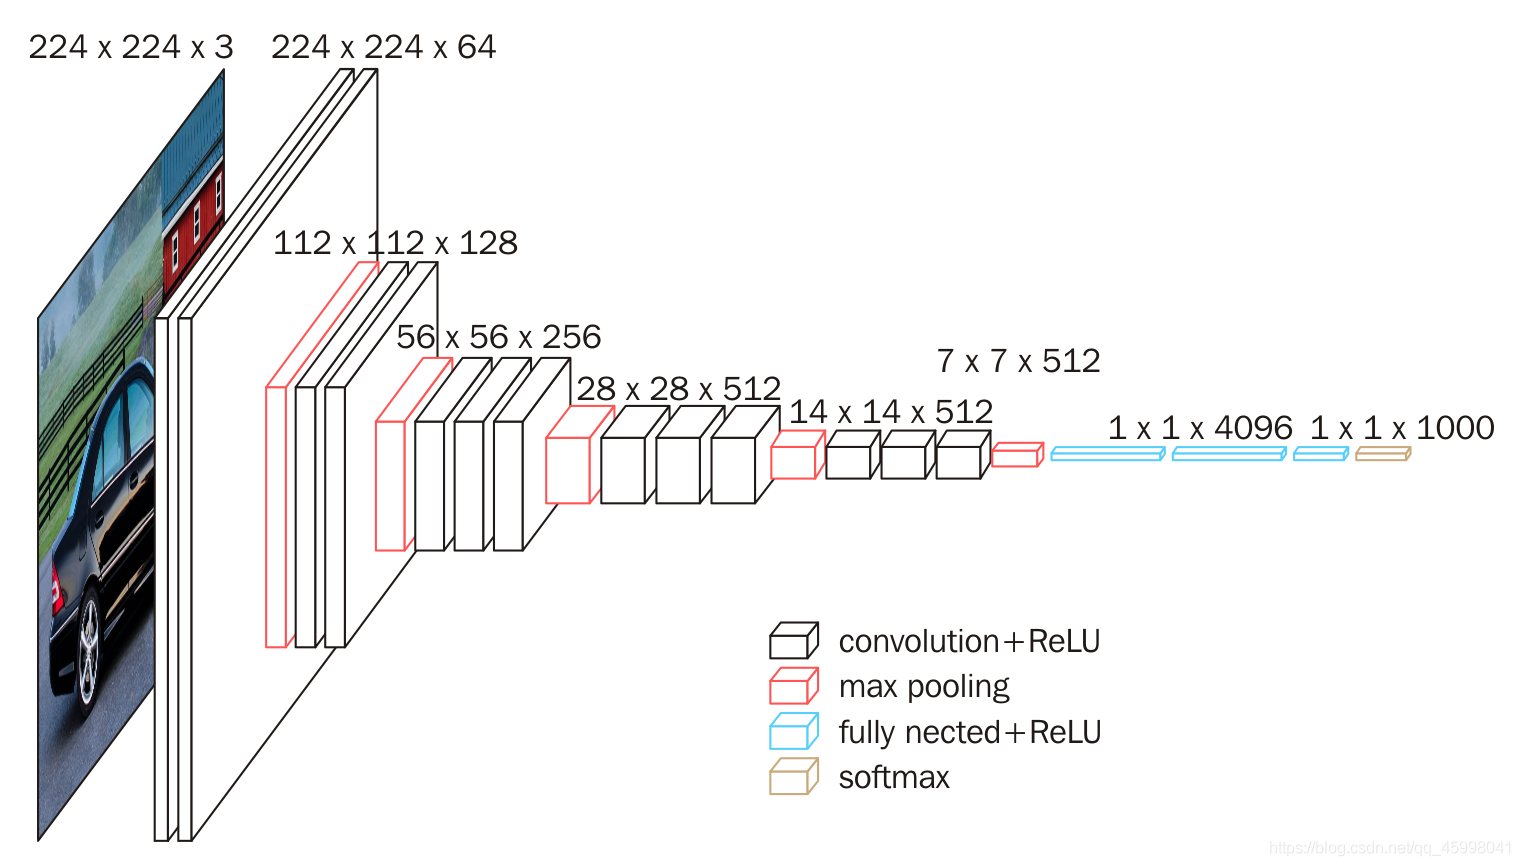

## VGG块

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs, in_channels, out_channels):
    """
    创建一个 VGG 模型的卷积块。

    参数:
    num_convs (int): 卷积层数量。
    in_channels (int): 输入通道数。
    out_channels (int): 输出通道数。

    返回:
    nn.Sequential: 包含卷积层和池化层的序列。
    """
    layers = []  # 存储卷积层和激活函数的列表
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels  # 更新输入通道数，以便下一层使用
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))  # 添加最大池化层
    return nn.Sequential(*layers)  # 返回卷积块的序列

## VGG网络

In [4]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [14]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for num_convs, out_channels in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

In [13]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## 训练模型

In [15]:
# VGG变种，输出通道数缩小4倍
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

training on cpu


KeyboardInterrupt: 

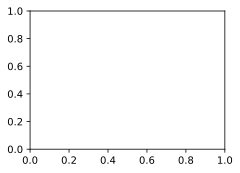

In [16]:
lr, num_epochs, batch_size = 0.05, 10, 128
# //为整除运算符，直接省略小数部分
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

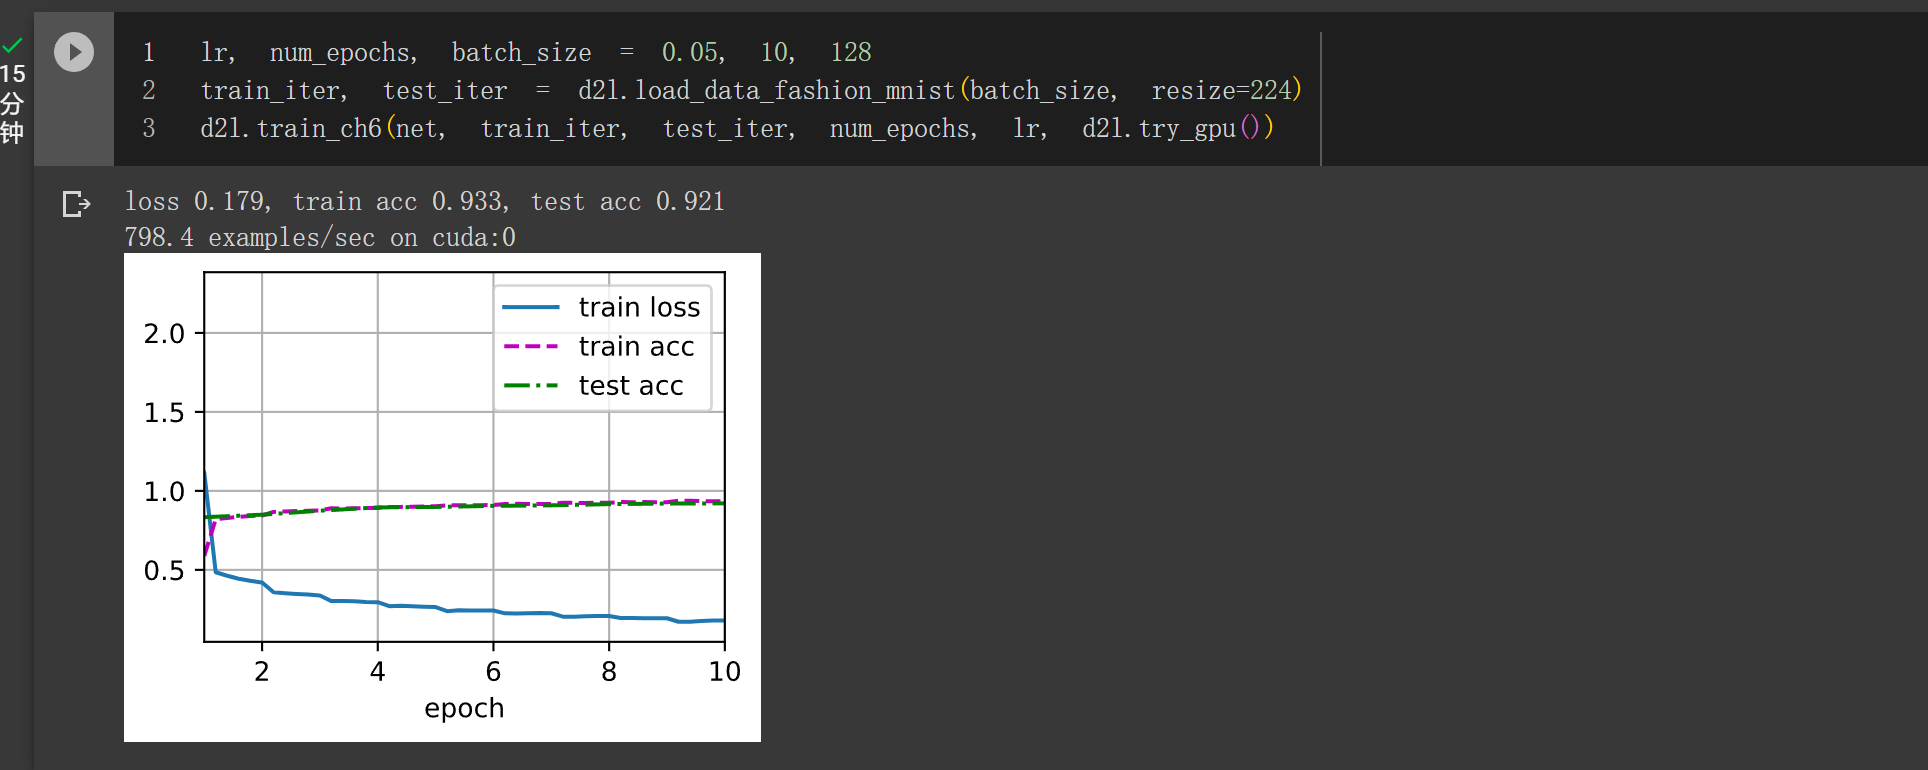